In [17]:
import numpy 
import math
import random
import operator
from PIL import Image


In [18]:
def calculate_distance(a,b):
    a = numpy.array(a)
    b = numpy.array(b)
    distance = max(abs(a-b))
    return distance

def initiate_centroids(K,image):
    imagePixels = list(image.getdata())
    initial_centers = list()
    for x in range(K):
        initial_centers.append(list(imagePixels[random.randint(0,len(imagePixels)-1)]))
    return initial_centers

def findClosestCentroids(centroids, image):
    
    imagePixels = list(image.getdata())
    assigned_centroid = []
    for p in imagePixels:
        distance = []
        for c in centroids:
            distance.append(calculate_distance(c, p))
        assigned_centroid.append(numpy.argmin(distance))
    return assigned_centroid

def responsibility(centroids, image):
    imagePixels = list(image.getdata())

    x = len(imagePixels)

    k = len(centroids)

    d = len(centroids[0])

    matrix = numpy.zeros((x,k,d))

    for p in range(x):

        distance = []

        for c in centroids:

            distance.append(calculate_distance(imagePixels[p], c))
        
        matrix[p,numpy.argmin(distance)] = [1]*d
    return matrix

def clustermeans(responsibility, image):

    Pixelarray = numpy.array(list(image.getdata()))

    clusters = len(responsibility[1])
    
    new_centroids = []
    
    for k in range(clusters):
        new_centroids.append(list(sum(responsibility[:,k] * Pixelarray)/sum(responsibility[:,k,0])))
    return new_centroids

def k_means2(image, K, iterations):
    
    centroids = initiate_centroids(K, image)

    new_centroids = []
    
    i = 0

    while i < iterations:  # Maximum of 6 iterations

        resmat = responsibility(centroids,image) 

        new_centroids = clustermeans(resmat, image) # New Centroids

        if new_centroids == centroids:  # End algortihm, if centroids don't change
            break
        
        centroids = new_centroids

        i += 1
        
    final_assignment = findClosestCentroids(centroids, image)



    rgb_array = numpy.array([[255,255,255]]*len(final_assignment))
    for i in range(3):
        rgb_array[:,i] = rgb_array[:,i]*final_assignment/max(final_assignment)
    rgb_array
    rgb_list = []
    for i in range(len(rgb_array)):
        rgb_list.append(tuple(rgb_array[i]))
    image_out = Image.new("RGB",image.size)
    image_out.putdata(rgb_list)
    image_out

    return image_out  # Assignment list can be used to create picture

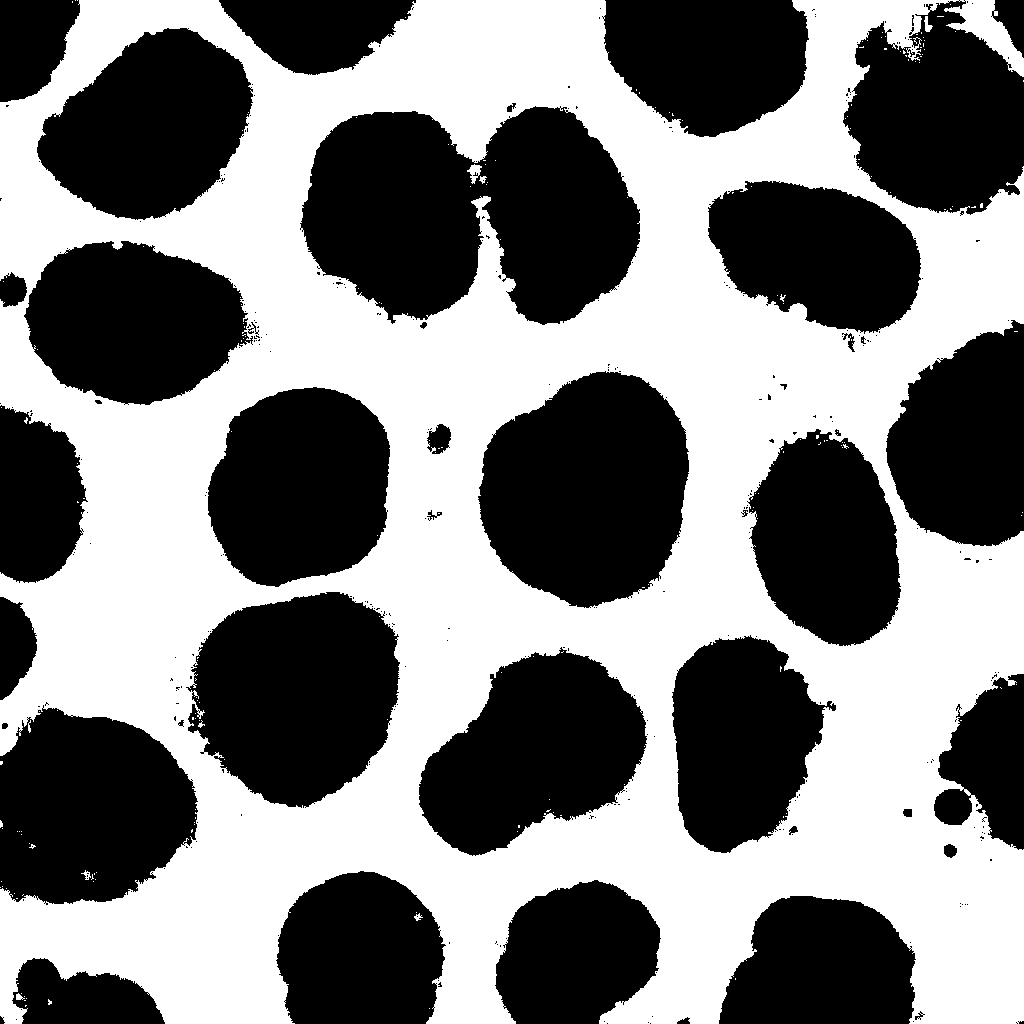

In [19]:
image = Image.open("../data/Cell_Nuclei.jpg",'r')

segmented_image = k_means2(image, 2, 30)

segmented_image # still somewhat inconsistent

In [20]:
segmented_image.save("../data/RGB_Kmeans_CN_Chebyshnev_30it.tiff")